https://leetcode.com/problems/binary-tree-cameras/

In [304]:
from jupyterthemes import jtplot
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

%load_ext memory_profiler


class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
def arr_to_bst(nums):
    
    if not len(nums): return
    nums = sorted(nums)
    n = len(nums)
    k = n // 2
    
    root = TreeNode(nums[k])
    root.left = arr_to_bst(nums[:k]) if k > 0 else None
    root.right = arr_to_bst(nums[k+1:]) if k+1 < n else None
        
    return root


def plot_bst(root, depth=0, ax=None):
    
    if not root:
        return ax
    
    if not ax:
        fig, ax = plt.subplots()
        ax.invert_yaxis()
    
    if root.left:
        ax.plot([root.val, root.left.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.left, depth+1, ax)
    
    if root.right:
        ax.plot([root.val, root.right.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.right, depth+1, ax)
        
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.annotate(root.val, (root.val, depth-0.05))
    
    return ax

<IPython.core.display.Javascript object>


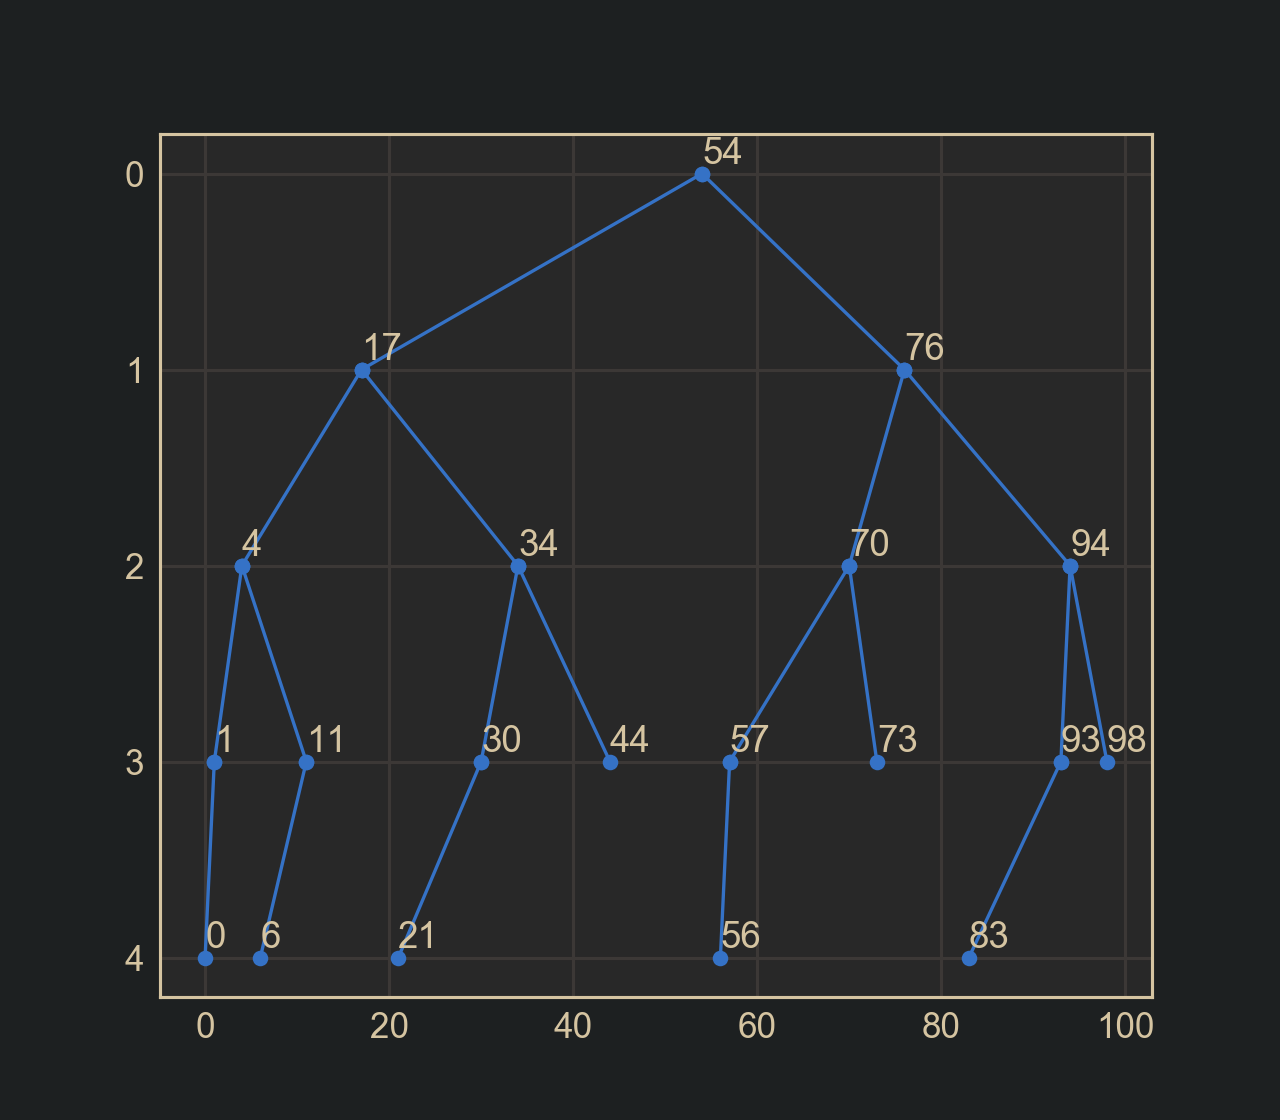

In [9]:
%matplotlib notebook

nums = np.random.randint(100, size=20)
root = arr_to_bst(nums)
ax = plot_bst(root)

# Solution 1

In [312]:
STATE_CODE = {
    'covered': -1,
    'camera': -2,
}

def is_leaf(root):
    if root:
        return not root.left and not root.right
    else:
        raise ValueError('Passed root is not <TreeNode> object')

def is_covered(root):
    return root.val in [STATE_CODE['covered'], STATE_CODE['camera']]

def is_camera(root):
    return root.val == STATE_CODE['camera']

def set_camera(root):
    root.val = STATE_CODE['camera']
    return root
    
def set_covered(root):
    root.val = STATE_CODE['covered']
    return root


def min_camera_cover(root, value=None):
    
    init_value = None if value is None else value
    value = 0 if value is None else value
    
    if not root: return root, value
    
    if is_leaf(root):
        # Set camera if leaf is not covered yet
        if not is_covered(root):
            root = set_camera(root)
            value += 1
        return root, value
            
            
    if root.left  and is_camera(root.left) \
    or root.right and is_camera(root.right): 
        # Check if node is already covered
        root = set_covered(root)
        
        
    if (root.left  and is_leaf(root.left)) \
    or (root.right and is_leaf(root.right)):

        if root.left  and not is_covered(root.left) \
        or root.right and not is_covered(root.right):
            # Set camera to current node
            root = set_camera(root)
            value += 1

            # Set child nodes to 'covered' state
            if root.left and not is_covered(root.left): 
                root.left = set_covered(root.left)
            if root.right and not is_covered(root.right):
                root.right = set_covered(root.right)

            # End if last node in subtree
            if  (not root.left  or is_leaf(root.left)) \
            and (not root.right or is_leaf(root.right)): 
                return root, value
                
            
    if root.left  and not is_leaf(root.left):
        # Check left subtree deeper
        root.left, value = min_camera_cover(root.left, value)
        
        # Start over
        if not is_covered(root.left):
            # If child node not covered, set camera
            if not is_camera(root):
                root = set_camera(root)
                value += 1
            
            # Set child nodes to 'covered' state
            if root.left and not is_covered(root.left): 
                root.left = set_covered(root.left)
            if root.right and not is_covered(root.right):
                root.right = set_covered(root.right)
        
        # Check if root is covered by left subtree
        if is_camera(root.left) and not is_covered(root): 
            root = set_covered(root)
            
    
    if root.right and not is_leaf(root.right):
        # Check right subtree deeper
        root.right, value = min_camera_cover(root.right, value)
        
        # Start over
        if not is_covered(root.right):
            # If child node not covered, set camera
            if not is_camera(root):
                root = set_camera(root)
                value += 1
            
            # Set child nodes to 'covered' state
            if root.left and not is_covered(root.left): 
                root.left = set_covered(root.left)
            if root.right and not is_covered(root.right):
                root.right = set_covered(root.right)
            
        # Check if root is covered by right subtree
        if is_camera(root.right) and not is_covered(root):
            root = set_covered(root)
           
        
    if is_covered(root):
        # Standard ending
        return root, value
    
    elif init_value is None: 
        # Root node ending
        root = set_camera(root)
        return root, value+1
    
    else:
        # Child node ending
        return root, value


class Solution:
    def minCameraCover(self, root, value=0):
        root, value = min_camera_cover(root)
        return value

In [297]:
# [0, null,0, 0,0, null,null,null,0]
root = TreeNode(0)
root.right = TreeNode(0)
root.right.left = TreeNode(0)
root.right.right = TreeNode(0)
root.right.right.right = TreeNode(0)
#ax = plot_bst(root)

Solution().minCameraCover(root)
#ax = plot_bst(root)

2

In [293]:
# [0, 0,null, null,0, 0,null, null,0, 0]
root = TreeNode(1)
root.left = TreeNode(2)
root.left.right = TreeNode(3)
root.left.right.left = TreeNode(4)
root.left.right.left.right = TreeNode(5)
root.left.right.left.right.left = TreeNode(6)

Solution().minCameraCover(root)

2

In [294]:
# [0, null,0, null,0, null,0]
root = TreeNode(1)
root.right = TreeNode(2)
root.right.right = TreeNode(3)
root.right.right.right = TreeNode(4)

Solution().minCameraCover(root)

2

In [295]:
# [0, 0,0, null,0]
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.right = TreeNode(4)

Solution().minCameraCover(root)

2

In [313]:
rstate = np.random.RandomState(0)
%timeit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

48 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [314]:
rstate = np.random.RandomState(0)
%memit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

peak memory: 136.44 MiB, increment: 0.00 MiB


# Solution 2: **Dynamic Programming**

In [315]:
class Solution:
    def minCameraCover(self, root):
        def solve(node):
            # 0: Strict ST; All nodes below this are covered, but not this one
            # 1: Normal ST; All nodes below and incl this are covered - no camera
            # 2: Placed camera; All nodes below this are covered, plus camera here

            if not node: return 0, 0, float('inf')
            L = solve(node.left)
            R = solve(node.right)

            dp0 = L[1] + R[1]
            dp1 = min(L[2] + min(R[1:]), R[2] + min(L[1:]))
            dp2 = 1 + min(L) + min(R)

            return dp0, dp1, dp2

        return min(solve(root)[1:])

In [316]:
rstate = np.random.RandomState(0)
%timeit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

39.6 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [317]:
rstate = np.random.RandomState(0)
%memit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

peak memory: 136.45 MiB, increment: 0.00 MiB


# Solution 3: **Greedy**

In [322]:
class Solution:
    def minCameraCover(self, root):
        self.ans = 0
        covered = {None}

        def dfs(node, par = None):
            if node:
                dfs(node.left, node)
                dfs(node.right, node)

                if (par is None and node not in covered 
                or node.left  not in covered 
                or node.right not in covered):
                    self.ans += 1
                    covered.update({node, par, node.left, node.right})

        dfs(root)
        return self.ans

In [323]:
rstate = np.random.RandomState(0)
%timeit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

26 ms ± 845 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [324]:
rstate = np.random.RandomState(0)
%memit Solution().minCameraCover(arr_to_bst(rstate.randint(10000, size=10000)))

peak memory: 112.00 MiB, increment: -0.64 MiB
